SRC
1. https://blog.edugrad.com/forecasting-and-modeling-with-a-multivariate-time-series-in-python/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
# import warnings
# warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import pacf
%matplotlib inline

In [2]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [3]:
df=pd.read_csv('./household_power_consumption.txt',sep=";")
print('Number of rows and columns:', df.shape)
df.head(5)

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of rows and columns: (2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000


In [4]:
df['date_time'] = pd.to_datetime(df["Date"]+" "+df["Time"])

In [5]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00


In [6]:
#df['date_time'] = pd.to_datetime(df['Global_active_power'], errors='coerce')
df=df.dropna(subset=['Global_active_power'])

In [7]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00


In [8]:
df['date_time']=pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].apply(lambda x: x.year)
df['quarter'] = df['date_time'].apply(lambda x: x.quarter)
df['month'] = df['date_time'].apply(lambda x: x.month)
df['day'] = df['date_time'].apply(lambda x: x.day)

In [9]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time,year,quarter,month,day
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000,2006-12-16 17:24:00,2006,4,12,16
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000,2006-12-16 17:25:00,2006,4,12,16
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000,2006-12-16 17:26:00,2006,4,12,16
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000,2006-12-16 17:27:00,2006,4,12,16
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000,2006-12-16 17:28:00,2006,4,12,16


In [10]:
df=df.loc[:,['date_time','Global_active_power','year','quarter','month','day']]
df.sort_values('date_time', inplace=True, ascending=True)
df = df.reset_index(drop=True)
df["weekday"]=df.apply(lambda row:row["date_time"].weekday(),axis=1)
df["weekday"]=(df["weekday"] < 5).astype(int)
print(df.shape)
print(df.date_time.min())
print(df.date_time.max())
df.tail(5)

(2075259, 7)
2006-12-16 17:24:00
2010-12-11 23:59:00


,date_time,Global_active_power,year,quarter,month,day,weekday
2075254,2010-12-11 23:55:00,0.6900,2010,4,12,11,0
2075255,2010-12-11 23:56:00,0.6880,2010,4,12,11,0
2075256,2010-12-11 23:57:00,0.6880,2010,4,12,11,0
2075257,2010-12-11 23:58:00,0.6880,2010,4,12,11,0
2075258,2010-12-11 23:59:00,0.6880,2010,4,12,11,0


In [11]:
df.isnull().sum()

date_time              0
Global_active_power    0
year                   0
quarter                0
month                  0
day                    0
weekday                0
dtype: int64

In [12]:
df1=df

In [ ]:
# stat, p = stats.normaltest(df1["Global_active_power"])

In [ ]:
# print('Statistics=%.3f, p=%.3f' % (stat, p))
# alpha = 0.05
# if p > alpha:
#     print('Data looks Gaussian (fail to reject H0)')
# else:
#     print('Data does not look Gaussian (reject H0)')

In [28]:
df1["Global_active_power"] = df1["Global_active_power"].str.replace("?","")

In [31]:
df1 = df1.fillna(method="ffill")

In [47]:
df1["Global_active_power"]= df1["Global_active_power"].str.split().str[0].str.replace(',','').astype(float)

In [33]:
df1 = df1.set_index("date_time")

In [48]:
df2=df1[(df1.index>'2010-07-01') & (df1.index<'2010-07-16')]

In [49]:
df2.dtypes

Global_active_power    float64
year                     int64
quarter                  int64
month                    int64
day                      int64
weekday                  int64
dtype: object

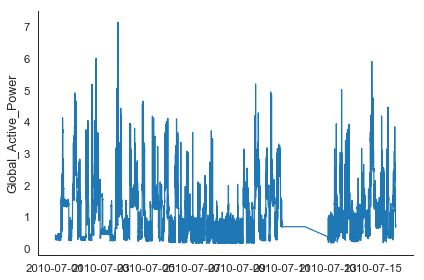

In [50]:
plt.plot(df2["Global_active_power"])
plt.ylabel('Global_Active_Power')
plt.legend().set_visible(False)
plt.tight_layout()
sns.despine(top=True)
plt.show();

### Box plot of yearly vs. quarterly Global active power

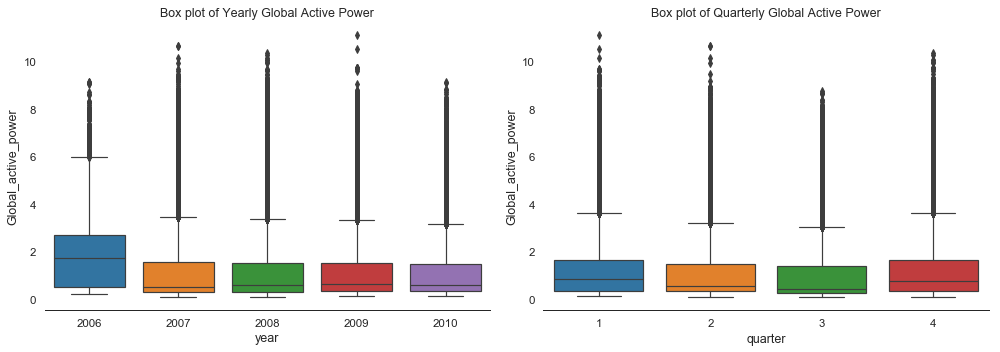

In [52]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.subplots_adjust(wspace=0.2)
sns.boxplot(x="year", y="Global_active_power", data=df1)
plt.xlabel('year')
plt.title('Box plot of Yearly Global Active Power')
sns.despine(left=True)
plt.tight_layout()

plt.subplot(1,2,2)
sns.boxplot(x="quarter", y="Global_active_power", data=df1)
plt.xlabel('quarter')
plt.title('Box plot of Quarterly Global Active Power')
sns.despine(left=True)
plt.tight_layout();

##### In yearly global active power, there is misleading visualization wherein 2006 the value is higher than in other years. On the other hand, in the case of quarterly power value, the data looks consistent with the first and the fourth quarters having higher values.

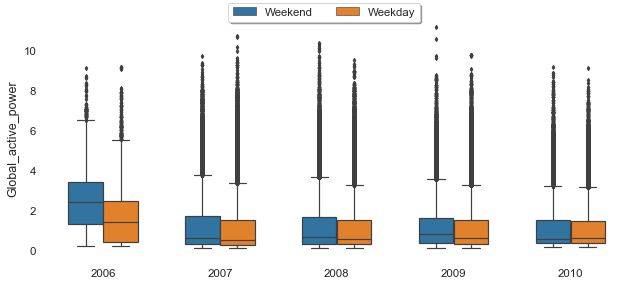

In [63]:
dic={0:'Weekend',1:'Weekday'}
df1['Day'] = df1.weekday.map(dic)

a=plt.figure(figsize=(9,4))
plt1=sns.boxplot('year', 'Global_active_power',  hue="Day",width=0.6, fliersize=3, data=df1)
a.legend(loc='upper center', bbox_to_anchor=(0.5,1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True)
plt.xlabel('')
plt.tight_layout()
plt.legend().set_visible(False);

Prior to 2010, the weekday’s value is lower than the weekends.

/Users/tendulkar/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/tendulkar/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


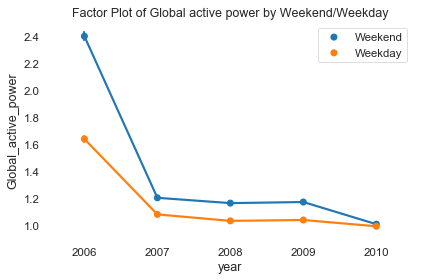

In [65]:
plt1=sns.factorplot('year','Global_active_power', hue='Day',
                    data=df1, size=4, aspect=1.5, legend=False)
plt.title('Factor Plot of Global active power by Weekend/Weekday')
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.legend(loc='upper right');

In [68]:
from sklearn.preprocessing import StandardScaler


In [69]:
scalar = StandardScaler()

In [70]:
dataset  =df1.Global_active_power.values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0,1))
dataset = scalar.fit_transform(dataset)
train_size = int(len(dataset)*0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [73]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

In [82]:
# reshape into X=t and Y=t+1
look_back = 30
x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

In [83]:
#reshape input to be [sample, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(x_train, y_train, epochs=1, batch_size=70, 
                    validation_data=(x_test, y_test),
                    callbacks=[EarlyStopping(monitor='val_loss', 
                    patience=10)], verbose=1, shuffle=False)

#Training Phase
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 1660176 samples, validate on 415021 samples
Epoch 1/1
